In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

<AxesSubplot: xlabel='date'>

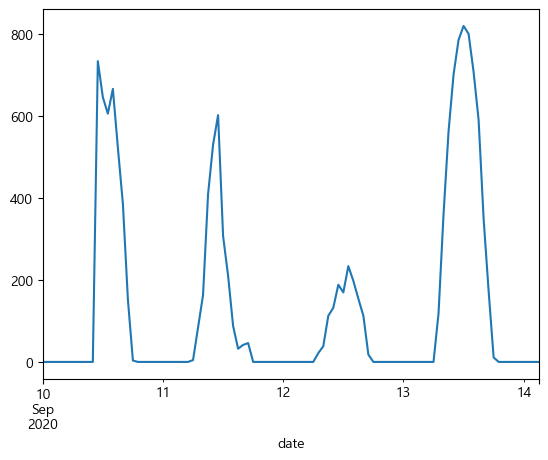

In [6]:
solar_eda.target[:100].plot()

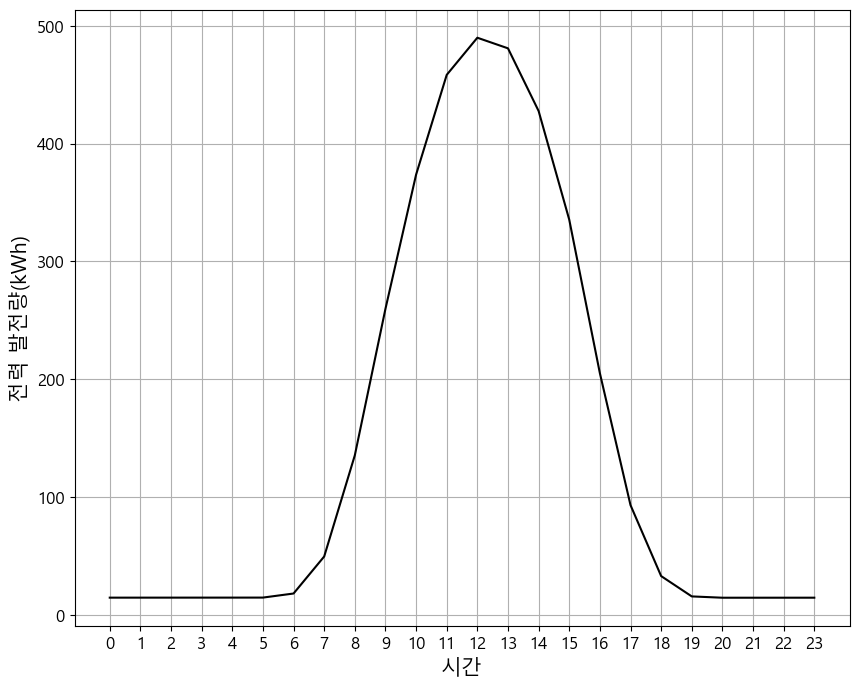

In [7]:
ee = solar.groupby(['hour']).mean().target
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [8]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [9]:
df.date_time = pd.to_datetime(df.date_time)

In [10]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [11]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [12]:
for i in tqdm(range(len(eda_df))):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day
    eda_df['요일'][i] = days[eda_df.date_time[i].weekday()]

100%|██████████| 122400/122400 [01:18<00:00, 1567.30it/s]


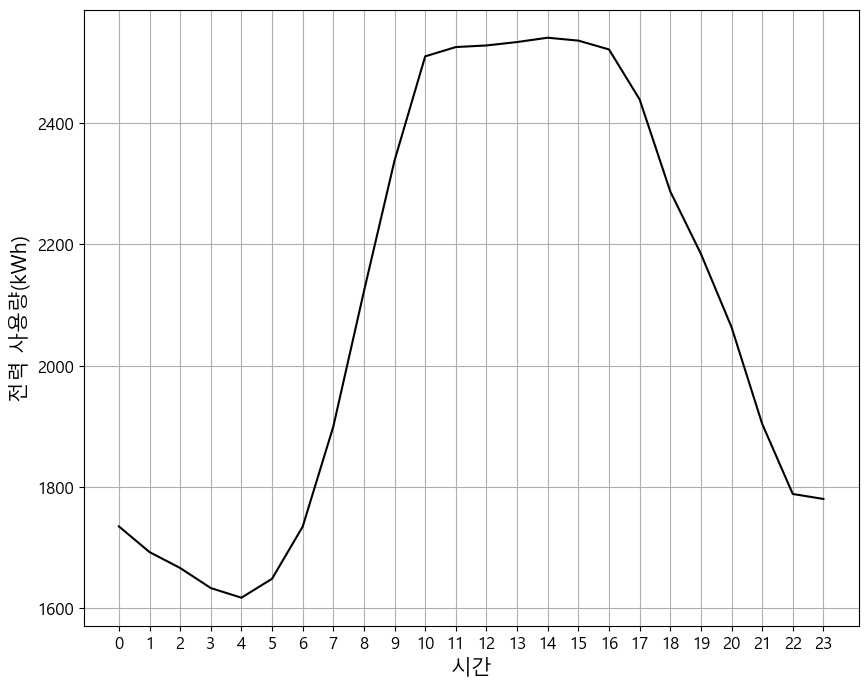

In [13]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.show()

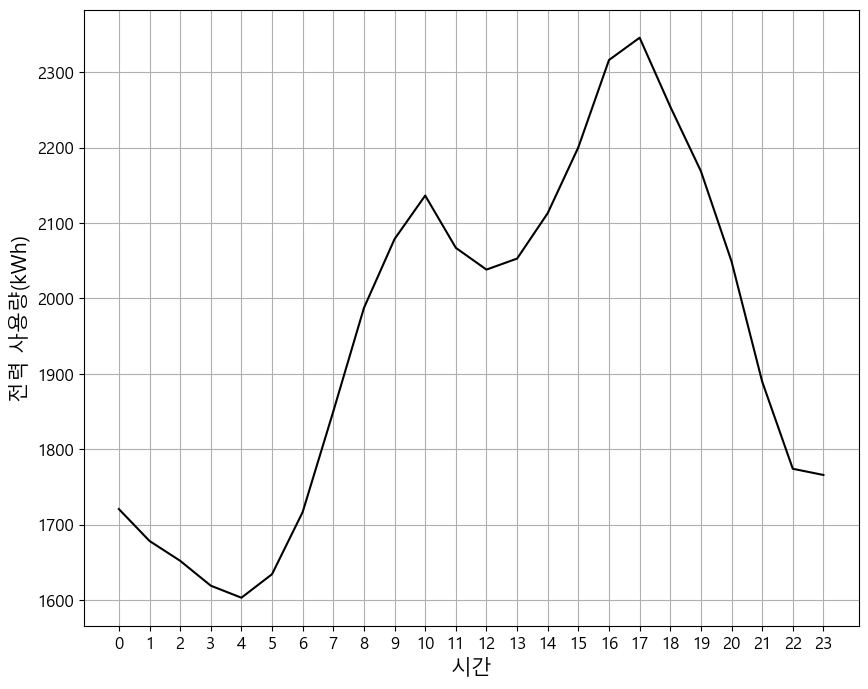

In [25]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.show()

In [14]:
time = [11, 12, 13, 14, 15, 16, 17, 18, 19]

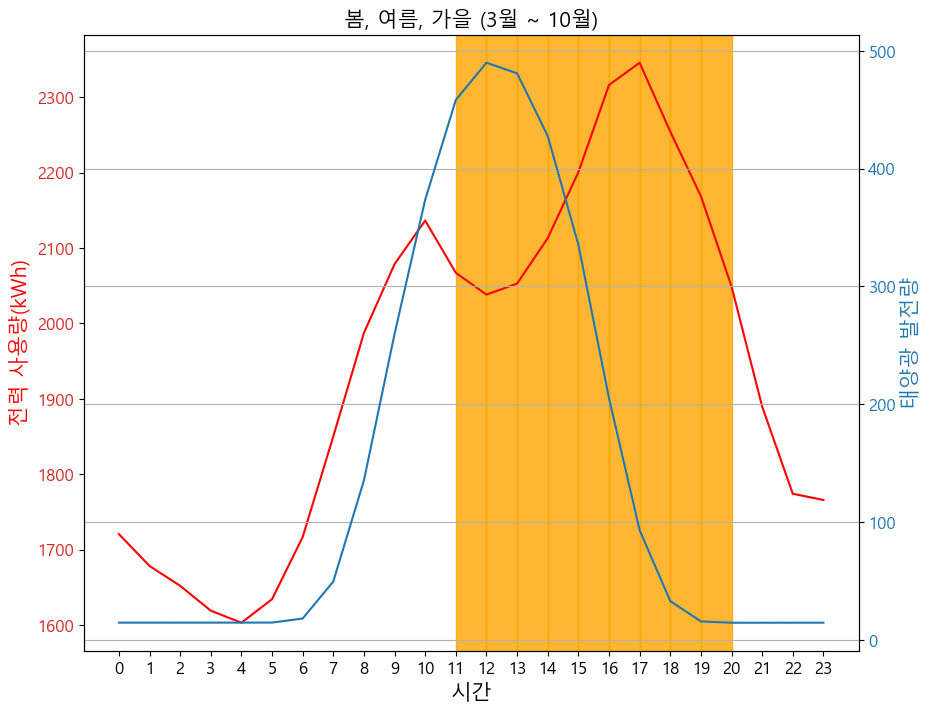

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('전력 사용량(kWh)', color='r', fontsize=15)
ax1.plot(qq - ee, color='r')
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을 (3월 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('태양광 발전량', color=color, fontsize=15)
ax2.plot(ee, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

for i in time:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')

plt.grid(True)
plt.show()

In [16]:
time2 = [9, 10, 11, 16, 17, 18, 19]

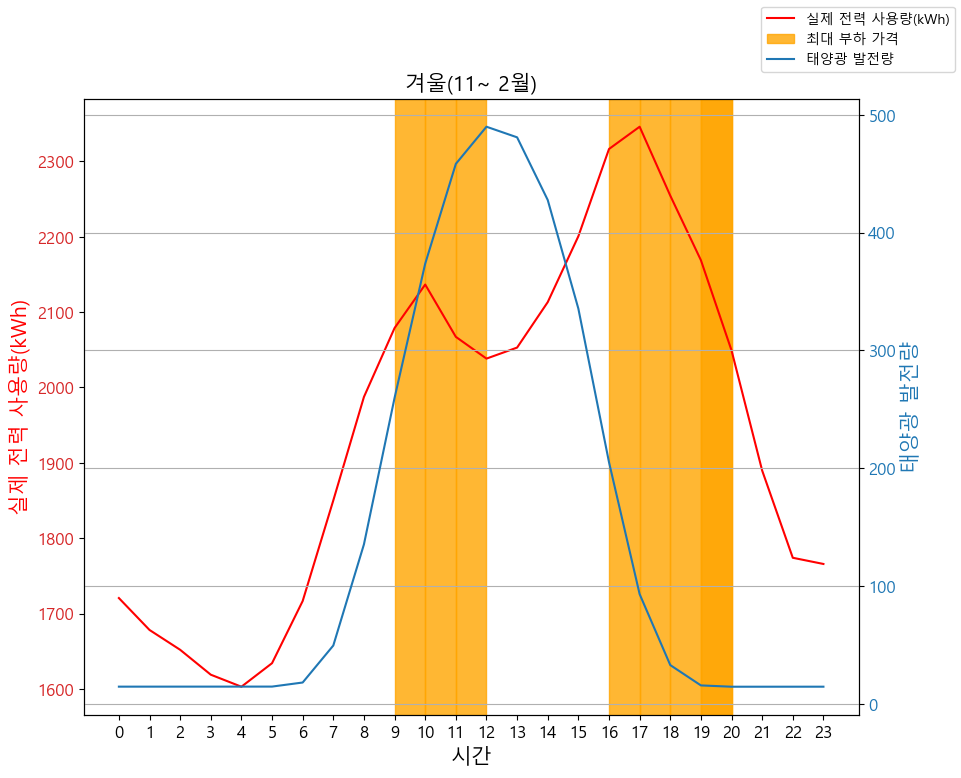

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('실제 전력 사용량(kWh)', color='r', fontsize=15)
ax1.plot(qq - ee, color='r', label = '실제 전력 사용량(kWh)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('태양광 발전량', color=color, fontsize=15)
ax2.plot(ee, color=color, label = '태양광 발전량')
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

for i in time2:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')

fig.legend()
plt.grid(True)
plt.show()

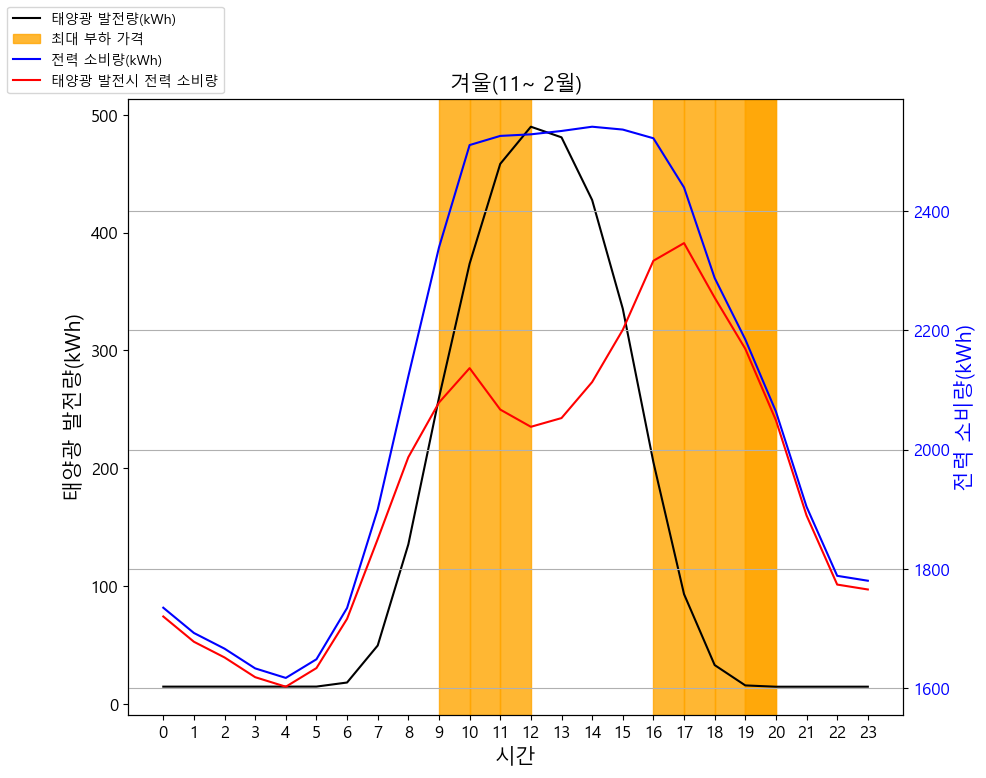

In [96]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')

for i in time2:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label='최대 부하 가격')

fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [18]:
sell = {
    '시간' : ['경부하', '중간부하', '최대부하'],
    '여름철' : ['84.8', '137.7', '219.8'],
    '봄 가을철' : ['84.8','107.3','138.0'],
    '겨울철' : ['91.8', '137.9', '195.4']
}

In [19]:
sell = pd.DataFrame(sell)

In [20]:
sell

,시간,여름철,봄 가을철,겨울철
0,경부하,84.8,84.8,91.8
1,중간부하,137.7,107.3,137.9
2,최대부하,219.8,138.0,195.4


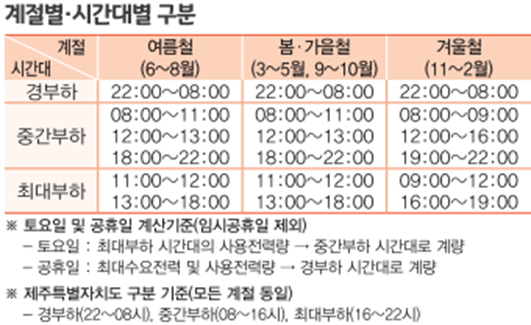

In [94]:
qq

hour
0     1735.225589
1     1692.903784
2     1666.609425
3     1633.573938
4     1617.613663
5     1648.865081
6     1734.799139
7     1899.729083
8     2122.854550
9     2338.618454
10    2510.151369
11    2525.470123
12    2528.122890
13    2533.748912
14    2540.869591
15    2536.093144
16    2521.542452
17    2439.140675
18    2287.514923
19    2184.609139
20    2063.785593
21    1904.353268
22    1788.636320
23    1780.426212
Name: 전력사용량(kWh), dtype: float64

In [21]:
winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [22]:
np.dot(winter_price, (qq-ee))

6540984.716282714

In [23]:
np.dot(winter_price, qq)

7101001.773278682

In [24]:
np.dot(winter_price, qq) - np.dot(winter_price, (qq - ee))

560017.0569959674

In [167]:
import numpy as np

# 예시 데이터
num_timesteps = 24
power_consumption = np.array([2.0, 2.5, 3.0, 3.5, 3.6, 3.5, 3.3, 3.0, 2.5, 2.0, 1.5, 1.2, 1.1, 1.0, 1.2, 1.5, 2.0, 2.5, 3.0, 3.5, 3.6, 3.5, 3.3, 3.0])
power_production = np.array([0.2, 0.3, 0.4, 0.6, 1.0, 2.0, 3.0, 4.0, 4.5, 4.7, 4.6, 4.4, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.2, 1.0, 0.8, 0.5, 0.3, 0.2])
price = np.array([100, 100, 120, 140, 150, 150, 140, 130, 120, 110, 100, 100, 110, 120, 130, 140, 150, 170, 170, 160, 150, 140, 130, 120, 110])


In [188]:
import pyswarms as ps

def optimize_power_consumption(power_consumption, power_production, price):
    # 비용 함수 (Cost Function) 정의
    def cost_function(x, power_consumption, power_production, price):
        # 제약 조건 처리
        x = np.minimum(x, np.roll(power_production, shift=1))
        # 비용 계산
        cost = np.sum((x - power_consumption) * price)
        return cost

    # power_consumption와 price의 크기를 num_timesteps로 변경
    power_consumption = np.resize(power_consumption, num_timesteps)
    price = np.resize(price, num_timesteps)

    # PSO 알고리즘 설정
    options = {'c1': 0.5, 'c2': 0.5, 'w':0.9}
    optimizer = ps.single.GlobalBestPSO(n_particles=500, dimensions=num_timesteps, options=options)

    # 최적화 실행
    cost, pos = optimizer.optimize(cost_function, iters=5000, power_consumption=power_consumption, power_production=power_production, price=price)

    # 파티클의 위치(pos)를 0 또는 power_production 이전 값으로 제한
    pos = np.maximum(pos, 0)
    pos = np.minimum(pos, np.roll(power_production, shift=1))

    return pos, cost


In [189]:
result = optimize_power_consumption(qq, ee, winter_price)

2023-05-07 23:38:47,695 - pyswarms.single.global_best - INFO - Optimize for 5000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|5000/5000, best_cost=-5.12e+12
2023-05-07 23:38:52,790 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -5124139704918.555, best pos: [-3.3271017  -4.75006301 -1.30787387 -3.91795354 -4.02810053 -4.2452044
 -6.91818602 -7.05464191 -1.7269293  -8.4606732  -2.2981712  -3.75331455
 -2.02009808 -0.90609862 -0.06290012 -2.29276134 -2.5772537  -3.80669976
 -5.47655421  0.45795521 -3.36218547 -5.46670645 -6.36184427 -0.97661693]


In [190]:
result

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.45795521,
        0.        , 0.        , 0.        , 0.        ]),
 -5124139704918.555)

In [195]:
import numpy as np
import pyswarms as ps

# 시간당 전력 소비량, 생산량, 가격 데이터
power_consumption = np.array([1735.225589, 1692.903784, 1666.609425, 1633.573938, 1617.613663,
                              1648.865081, 1734.799139, 1899.729083, 2122.854550, 2338.618454,
                              2510.151369, 2525.470123, 2528.122890, 2533.748912, 2540.869591,
                              2536.093144, 2521.542452, 2439.140675, 2287.514923, 2184.609139,
                              2063.785593, 1904.353268, 1788.636320, 1780.426212])

power_production = np.array([14.695567, 14.704347, 14.713127, 14.721910, 14.730692, 14.750215,
                             18.207094, 49.612345, 135.461516, 259.786336, 373.648489, 458.348685,
                             489.872779, 480.872653, 427.686313, 335.477846, 205.181878, 93.216179,
                             33.007369, 15.749574, 14.635928, 14.644688, 14.653459, 14.662224])

price = [91.8, 91.8, 91.8, 91.8, 91.8, 91.8, 91.8, 91.8, 137.9, 195.4, 195.4, 195.4, 137.9,
         137.9, 137.9, 137.9, 195.4, 195.4, 195.4, 195.4, 137.9, 137.9, 91.8, 91.8]

num_timesteps = 24  # 시간 단위

# 비용 함수 정의
def cost_function(x, power_consumption, power_production, price):
    for i in range(1, len(x)):
        x[i] = min(x[i], power_production[i-1])
    # 비용 계산
    cost = np.sum((x - power_consumption) * price)
    return cost

# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=num_timesteps, options=options)

# 최적화 실행
cost, pos = optimizer.optimize(cost_function, iters=1000, power_consumption=power_consumption,
                                power_production=power_production, price=price)

# 결과 출력
print(f"최적 전력 사용량: {pos}")
print(f"최적 전력 사용량에 대한 비용: {cost}")


2023-05-07 23:43:41,057 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/1000


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()